<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(300, 195, 0);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Importing required dependencies</h1>
    <br>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker as ticks 

import seaborn as sns

from scipy import stats

<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(255, 195, 0);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Loading Dataset</h1>
    <br>
    </div>
</div>

In [2]:
pd.set_option('display.max_rows', 2000)
claims = pd.read_csv(r"data/claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
cust = pd.read_csv(r"data/cust_demographics.csv")
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
cust = cust.rename(columns = {"CUST_ID":"customer_id"})
cust.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel" style="-webkit-text-size-adjust: 100%;">
<div class="box-shadow-object"  
     style="
            -webkit-text-size-adjust: auto;
            -webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            -moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: 10px 10px 0px 0px  rgba(0, 0, 0, 0.69); 
            background-color: rgb(255, 195, 0);
            position: relative;">
    <br>
    <h1 style = " 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 15px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Exploratory Data Analyis</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(239, 234, 175);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
                position: relative; 
               ">
        <b>FILE NAME/DATASET:</b> claims.csv; cust_demographics.csv<br>
    </p>
    <br>
    <pre style="
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(239, 234, 175);
                color: #000;
                font-weight: 60;
                margin-left: 15px; 
                margin-right: 15px;
                font-size: calc(1rem + ((1vw - 0.48em) * 0.6944));
             ">
Table: <b>Claims</b>
+======================+===========+     
| <b>column_name</b>          | <b>data_type</b> |     
+======================+===========+     
| claim_id             | int64     |     
| customer_id          | int64     |     
| incident_cause       | object    |     
| claim_date           | object    |     
| claim_area           | object    |     
| police_report        | object    |     
| claim_type           | object    |     
| claim_amount         | object    |     
| total_policy_claims  | float64   |     
| fraudulent           | object    |     
+----------------------+-----------+    
<br></br>
Table: <b>Customer Demographic</b>
+==============+===========+
| <b>column_name</b>  | <b>data_type</b> |
+==============+===========+
| CUST_ID      | int64     |
| gender       | object    |
| DateOfBirth  | object    |
| State        | object    |
| Contact      | object    |
| Segment      | object    |
+--------------+-----------+
<br>
Table: <b>Merged dataset (merge_1)</b>     
+======================+===========+==============+
| <b>column_name</b>          | <b>data_type</b> | <b>null_records</b> |
+======================+===========+==============+
| customer_id          | int64     | 0            |
| gender               | object    | 0            |
| DateOfBirth          | object    | 0            |
| State                | object    | 0            |
| Contact              | object    | 0            |
| Segment              | object    | 0            |
| claim_id             | int64     | 0            |
| incident_cause       | object    | 0            |
| claim_date           | object    | 0            |
| claim_area           | object    | 0            |
| police_report        | object    | 0            |
| claim_type           | object    | 0            |
| claim_amount         | object    | 65           |
| total_policy_claims  | float64   | 10           |
| fraudulent           | object    | 0            |
+----------------------+-----------+--------------+
</pre>
<br>
<style>
        .box-shadow-object {
            font-size: 4vw;
            text-align: center;
            border: 2px solid black;
        }
    </style>
    </div>
</div>
</div>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Null Record columns:</h6>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(224, 234, 242);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">-claim_amount<br>-total_policy_claims</p>
    <br>
    </div>
</div>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-1: Exploring data types and unique values</h6>
    <br>
    </div>
</div>

In [5]:
print("{}".format("\033[1mData Frame columns data types: \033[0m"))
print('')
print(claims.info())
print('\n')
print("{}".format("\033[1mUnique Values: \033[0m"))
print('')
print(claims.nunique())
print('\n')
print("{}".format("\033[1mData Frame Overview: \033[0m"))
print('')
claims.head()

Data Frame columns data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB
None


Unique Values: 

claim_id               1100
customer_id            1093
incident_cause            5
claim_date              100
claim_area                2
police_report             3
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
print("{}".format("\033[1mData Frame columns data types: \033[0m"))
print('')
print(cust.info())
print('\n')
print("{}".format("\033[1mUnique Values: \033[0m"))
print('')
print(cust.nunique())
print('\n')
print("{}".format("\033[1mData Frame Overview: \033[0m"))
print('')
cust.head()

Data Frame columns data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB
None


Unique Values: 

customer_id    1085
gender            2
DateOfBirth    1085
State            50
Contact        1085
Segment           3
dtype: int64


Data Frame Overview: 



,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-2: Exploring Null columns, rows and values</h6>
    <br>
    </div>
</div>

In [7]:
for column_name in claims.columns:
    print("\033[1m" + column_name + "\033[0m Null record count: ", 
      len(claims.loc[claims[column_name].isna() == True, column_name]))

claim_id Null record count:  0
customer_id Null record count:  0
incident_cause Null record count:  0
claim_date Null record count:  0
claim_area Null record count:  0
police_report Null record count:  0
claim_type Null record count:  0
claim_amount Null record count:  65
total_policy_claims Null record count:  10
fraudulent Null record count:  0


In [8]:
for column_name in cust.columns:
    print("\033[1m" + column_name + "\033[0m Null record count: ", 
      len(cust.loc[cust[column_name].isna() == True, column_name]))

customer_id Null record count:  0
gender Null record count:  0
DateOfBirth Null record count:  0
State Null record count:  0
Contact Null record count:  0
Segment Null record count:  0


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-3: Merging the tables</h6>
    <br>
    </div>
</div>

In [9]:
merge_1 = pd.merge(left = cust, right = claims, on = 'customer_id', how = 'inner')

In [10]:
print("{}".format("\033[1mData Frame columns data types: \033[0m"))
print('')
print(merge_1.info())
print('\n')
print("{}".format("\033[1mUnique Values: \033[0m"))
print('')
print(merge_1.nunique())
print('\n')
print("{}".format("\033[1mData Frame Overview: \033[0m"))
print('')
merge_1.head()

Data Frame columns data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: fl

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [11]:
for column_name in merge_1.columns:
    print("\033[1m" + column_name + "\033[0m Null record count: ", 
      len(merge_1.loc[merge_1[column_name].isna() == True, column_name]))

customer_id Null record count:  0
gender Null record count:  0
DateOfBirth Null record count:  0
State Null record count:  0
Contact Null record count:  0
Segment Null record count:  0
claim_id Null record count:  0
incident_cause Null record count:  0
claim_date Null record count:  0
claim_area Null record count:  0
police_report Null record count:  0
claim_type Null record count:  0
claim_amount Null record count:  65
total_policy_claims Null record count:  10
fraudulent Null record count:  0


In [12]:
merge_1.loc[merge_1['total_policy_claims'].isna() == True, "total_policy_claims":"total_policy_claims"].style.highlight_null(color = '#cd4f39')

,total_policy_claims
33,nan
276,nan
285,nan
369,nan
454,nan
462,nan
472,nan
493,nan
732,nan
1042,nan


In [13]:
merge_1.loc[merge_1['claim_amount'].isna() == True, "claim_amount":"claim_amount"].style.highlight_null(color = '#cd4f39')

,claim_amount
24,nan
26,nan
51,nan
52,nan
70,nan
78,nan
84,nan
89,nan
95,nan
103,nan


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-4: Fixing Data types</h6>
    <br>
    </div>
</div>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Fixing Inconsistent date format</h6>
    <br>
    </div>
</div>

In [14]:
merge_1['claim_date'] = pd.to_datetime(merge_1['claim_date'], format = '%m/%d/%Y')
merge_1['claim_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1085 entries, 0 to 1084
Series name: claim_date
Non-Null Count  Dtype         
--------------  -----         
1085 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.6 KB


In [15]:
merge_1['DateOfBirth'] = pd.to_datetime(merge_1['DateOfBirth'], format = '%d-%b-%y')
merge_1['DateOfBirth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1085 entries, 0 to 1084
Series name: DateOfBirth
Non-Null Count  Dtype         
--------------  -----         
1085 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.6 KB


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Adjusting Datetime variables:</b> There are multiple values that have incorrect year/arbitrary year. We need to fix that.<br>
    </p>
    <br>
    </div>
</div>

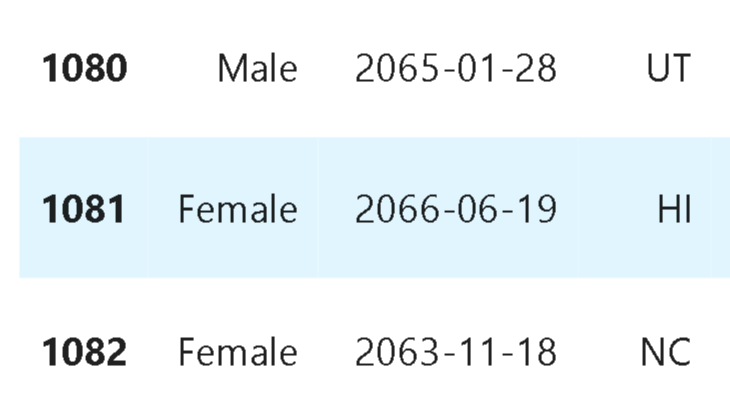

In [16]:
def set_dt(x):
    updatedYear = x.year - 100 if x.year > 2024 else x.year
    return dt.date(updatedYear, x.month, x.day)

merge_1['DateOfBirth'] = merge_1['DateOfBirth'].apply(set_dt)
merge_1['claim_date'] = merge_1['claim_date'].apply(set_dt)

In [17]:
merge_1['DateOfBirth'] = pd.to_datetime(merge_1['DateOfBirth'], format = '%Y-%m-%d')
merge_1['claim_date'] = pd.to_datetime(merge_1['claim_date'], format = '%Y-%m-%d')

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Casting "claim_amount" to suitable dtype</h6>
    <br>
    </div>
</div>

In [18]:
merge_1['claim_amount'] = merge_1['claim_amount'].apply(lambda x: str(x).split('$', maxsplit = 1)[:][-1])
merge_1['claim_amount'].sample(15)

216    20660
806      nan
123     2560
129    19240
220    21830
67      2910
135     1380
188      nan
884     1910
68     33550
957     3151
479     2320
554     1480
721    18140
532    20033
Name: claim_amount, dtype: object

In [21]:
merge_1['claim_amount'] = merge_1['claim_amount'].apply(lambda x: float(x))

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-5: Replacing nulls</h6>
    <br>
    </div>
</div>

In [22]:
merge_1['claim_amount'] = merge_1['claim_amount'].fillna(merge_1['claim_amount'].mean())

In [23]:
merge_1['claim_amount'] = pd.to_numeric(merge_1['claim_amount'].map('{:.2f}'.format), errors ='coerce')
merge_1['claim_amount'].sample(15)

958     42872.00
48      27230.00
520      2590.00
723      2740.00
306      1550.00
1037     1330.00
60       2470.00
949      1800.00
332     20550.00
1042     2380.00
95      12467.68
406     20769.00
369      1900.00
442      1320.00
72       1242.00
Name: claim_amount, dtype: float64

In [24]:
merge_1['total_policy_claims'].fillna(merge_1['total_policy_claims'].mode())

0       1.0
1       3.0
2       1.0
3       6.0
4       1.0
5       1.0
6       1.0
7       2.0
8       3.0
9       1.0
10      4.0
11      3.0
12      1.0
13      2.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
30      4.0
31      1.0
32      1.0
33      NaN
34      1.0
35      1.0
36      1.0
37      1.0
38      1.0
39      1.0
40      1.0
41      1.0
42      1.0
43      5.0
44      1.0
45      1.0
46      2.0
47      1.0
48      1.0
49      1.0
50      1.0
51      5.0
52      1.0
53      1.0
54      1.0
55      7.0
56      3.0
57      3.0
58      1.0
59      1.0
60      1.0
61      1.0
62      4.0
63      1.0
64      1.0
65      1.0
66      4.0
67      1.0
68      1.0
69      1.0
70      1.0
71      3.0
72      1.0
73      2.0
74      1.0
75      1.0
76      1.0
77      1.0
78      1.0
79      1.0
80      1.0
81      6.0
82      1.0
83  

In [25]:
policy_claims_mode = merge_1['total_policy_claims'].apply(lambda x: str(x).split('.', maxsplit = 1)[0]).mode()
merge_1['total_policy_claims'] = merge_1['total_policy_claims'].fillna(policy_claims_mode[0])
merge_1['total_policy_claims'].sample(15)

224     1.0
905     1.0
773     1.0
15      1.0
247     4.0
391     1.0
481     1.0
629     5.0
462       1
42      1.0
652     3.0
638     1.0
32      1.0
1023    1.0
578     1.0
Name: total_policy_claims, dtype: object

In [26]:
merge_1['total_policy_claims'] = merge_1['total_policy_claims'].apply(lambda x: str(x).split('.', maxsplit = 1)[0])
merge_1['total_policy_claims'] = merge_1['total_policy_claims'].apply(lambda x: int(x))

In [27]:
for column_name in merge_1.columns:
    print("\033[1m" + column_name + "\033[0m Null record count: ", 
      len(merge_1.loc[merge_1[column_name].isna() == True, column_name]))

customer_id Null record count:  0
gender Null record count:  0
DateOfBirth Null record count:  0
State Null record count:  0
Contact Null record count:  0
Segment Null record count:  0
claim_id Null record count:  0
incident_cause Null record count:  0
claim_date Null record count:  0
claim_area Null record count:  0
police_report Null record count:  0
claim_type Null record count:  0
claim_amount Null record count:  0
total_policy_claims Null record count:  0
fraudulent Null record count:  0


In [28]:
print("{}".format("\033[1mData Frame columns data types: \033[0m"))
print('')
print(merge_1.info())
print('\n')
print("{}".format("\033[1mUnique Values: \033[0m"))
print('')
print(merge_1.nunique())
print('\n')
print("{}".format("\033[1mData Frame Overview: \033[0m"))
print('')
merge_1.head()

Data Frame columns data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1085 non-null   float64       
 13  

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No


<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-6: Creating flags for reported/un-documented claims</h6>
    <br>
    </div>
</div>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>Note:</b> Please note that it is not explicitly established, what falls under the category of "reported" and "non-reported" claims. "Unknown" could mean a range of things like "Was claim not reported to police?" and "Is it not known if the police was informed or not?". Hence, we will take two cases described below:<br><br>
<b>Case-1:</b> Categorising "Unknown" and "No" in variable - <b>police_report</b> under flag - 0.<br>
<b>Case-2:</b> Categorising only "Unknown" in variable - <b>police_report</b> under flag - 0.<br>
    </p>
    <br>
    </div>
</div>

In [29]:
merge_1['claim_type'].unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [30]:
pd.set_option('future.no_silent_downcasting', True)
#Case-1: Categorising "Unknown" and "No" in variable - police_report under flag - 0.
subset_1 = merge_1
subset_1['flag'] = subset_1['police_report'].replace({'No':0, 'Yes':1, 'Unknown':0})

#Case-2: Categorising only "Unknown" in variable - police_report under flag - 0.
subset_2 = merge_1
subset_2['flag'] = subset_2['police_report'].replace({'No':1, 'Yes':1, 'Unknown':0})

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Case-1:</b> Categorising "Unknown" and "No" in variable - <b>police_report</b> under flag - 0.<br>
    </p>
    <br>
    </div>
</div>

In [31]:
subset_1[['police_report', 'flag']].sample(15)

,police_report,flag
912,Unknown,0
1030,No,1
13,No,1
771,No,1
190,No,1
432,No,1
81,No,1
351,No,1
221,No,1
361,Unknown,0


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Case-2:</b> Categorising only "Unknown" in variable - <b>police_report</b> under flag - 0.<br>
    </p>
    <br>
    </div>
</div>

In [32]:
subset_2[['police_report', 'flag']].sample(15)

,police_report,flag
269,Yes,1
769,Yes,1
644,No,1
928,Unknown,0
729,No,1
61,No,1
635,No,1
296,No,1
596,Yes,1
619,Unknown,0


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-7: Eliminating redundant values</h6>
    <br>
    </div>
</div>

In [33]:
subset_1.drop_duplicates(subset = 'customer_id', keep = 'last', inplace = True)
subset_2.drop_duplicates(subset = 'customer_id', keep = 'last', inplace = True)

In [34]:
print("{}".format("\033[1mData Frame columns data types: \033[0m"))
print('')
print(subset_1.info())
print('\n')
print("{}".format("\033[1mUnique Values: \033[0m"))
print('')
print(subset_1.nunique())
print('\n')
print("{}".format("\033[1mData Frame Overview: \033[0m"))
print('')
subset_1.head()

Data Frame columns data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1078 non-null   float64       
 13  total

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,1
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,0
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,1


In [35]:
print("{}".format("\033[1mData Frame columns data types: \033[0m"))
print('')
print(subset_2.info())
print('\n')
print("{}".format("\033[1mUnique Values: \033[0m"))
print('')
print(subset_2.nunique())
print('\n')
print("{}".format("\033[1mData Frame Overview: \033[0m"))
print('')
subset_2.head()

Data Frame columns data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1078 non-null   float64       
 13  total

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,1
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,0
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,1


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(101, 185, 249);">
    <br>
    <h6 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Step-8: Exporting the Prepared dataset (both subset_1 and subset_2)</h6>
    <br>
    </div>
</div>

In [36]:
subset_1.to_csv(r"data/data_audit_flag_subset_1.csv")
subset_2.to_csv(r"data/data_audit_flag_subset_2.csv")

<br></br>
<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Age Groups:</b> First, we will compute age of customers using variable - <b>DateOfBirth</b> and then categorize them accordingly.<br>
    </p>
    <br>
    </div>
</div>

In [37]:
bMonthDay = pd.to_datetime(subset_1['DateOfBirth']).apply(lambda x: (x.month, x.day))
diffMonthDay = bMonthDay > (dt.datetime.now().month, dt.datetime.now().day)
diffYear = dt.datetime.now().year - pd.to_datetime(subset_1['DateOfBirth']).dt.year
subset_1['Age'] = diffYear - diffMonthDay
subset_1.sample(15)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
750,80562391,Female,1960-02-24,NY,521-689-3269,Gold,2228834,Crime,2017-03-29,Auto,Unknown,Material only,3369.5,1,Yes,0,64
996,73685982,Female,1998-03-12,WV,943-981-6734,Platinum,16221546,Other driver error,2017-05-02,Home,No,Material only,1470.0,1,No,1,26
429,86818440,Male,1983-12-28,WA,397-129-9435,Platinum,13132889,Other causes,2018-03-21,Auto,Unknown,Material and injury,31901.0,1,Yes,0,40
688,72363224,Male,1969-01-06,SC,271-324-8534,Silver,78204177,Natural causes,2018-01-13,Auto,No,Material only,1500.0,1,No,1,55
842,64270813,Female,1996-03-13,WY,643-297-4563,Silver,52976799,Other driver error,2017-08-24,Auto,Unknown,Material only,1748.0,1,Yes,0,28
167,72556809,Male,1998-01-14,ID,582-928-4938,Platinum,65264955,Other causes,2018-08-16,Auto,Yes,Material and injury,32300.0,2,No,1,26
1035,18369428,Male,1993-05-03,OK,256-457-9645,Gold,22576028,Other causes,2017-08-11,Auto,No,Material only,1472.0,1,Yes,1,31
644,97545319,Male,1963-04-18,OR,749-261-7893,Silver,3487779,Crime,2018-06-30,Auto,No,Injury only,33520.0,1,No,1,61
214,94041088,Male,1990-07-16,NM,815-641-3516,Silver,70086627,Natural causes,2017-12-10,Home,Unknown,Material only,2645.0,1,Yes,0,34
205,26965990,Female,1998-12-14,NH,823-634-8723,Platinum,2262550,Other causes,2017-02-23,Auto,Unknown,Material only,2310.0,1,No,0,25


In [38]:
bMonthDay = pd.to_datetime(subset_1['DateOfBirth']).apply(lambda x: (x.month, x.day))
diffMonthDay = bMonthDay > (dt.datetime.now().month, dt.datetime.now().day)
diffYear = dt.datetime.now().year - pd.to_datetime(subset_1['DateOfBirth']).dt.year
subset_2['Age'] = diffYear - diffMonthDay
subset_2.sample(15)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
741,62861487,Male,1987-08-09,NV,851-758-3157,Gold,39476021,Other causes,2018-10-23,Auto,Yes,Injury only,19340.0,1,No,1,37
126,92889077,Female,1963-03-08,AR,975-548-7142,Gold,57560277,Natural causes,2018-03-08,Home,No,Material only,1771.0,5,Yes,1,61
990,86164274,Male,1962-12-28,SC,843-361-2796,Platinum,16402994,Other causes,2018-09-26,Home,Unknown,Material and injury,15760.0,1,No,0,61
413,95002919,Male,1964-04-15,TN,128-196-6753,Platinum,21915563,Natural causes,2018-06-30,Home,No,Material and injury,31110.0,1,No,1,60
62,77436411,Female,1964-05-06,TN,679-324-1357,Platinum,37727681,Other driver error,2018-02-02,Auto,Unknown,Material only,3358.0,4,Yes,0,60
471,83080037,Male,1982-06-16,MA,965-968-1539,Silver,63446024,Driver error,2018-01-13,Auto,Unknown,Injury only,17250.0,1,No,0,42
576,64214079,Male,1981-02-26,ME,579-765-9642,Gold,55084633,Other causes,2017-06-18,Auto,Yes,Material and injury,30230.0,1,No,1,43
699,81371138,Female,1963-11-09,MI,198-641-6743,Gold,57099061,Other causes,2017-07-28,Auto,No,Material only,3358.0,1,Yes,1,60
501,44758258,Female,1985-11-14,NJ,789-241-7938,Silver,69139904,Driver error,2017-06-18,Auto,Unknown,Material and injury,27910.0,1,No,0,38
448,59793026,Male,1966-12-09,ME,231-719-3629,Gold,76745084,Other driver error,2017-09-07,Auto,Yes,Material and injury,40210.0,1,No,1,57


In [39]:
subset_1.loc[subset_1['Age'].between(0, 17, 'both'), 'age_group'] = 'Children'
subset_1.loc[subset_1['Age'].between(18, 30, 'right'), 'age_group'] = 'Youth'
subset_1.loc[subset_1['Age'].between(30, 60, 'right'), 'age_group'] = 'Adult'
subset_1.loc[subset_1['Age'].between(60, 200, 'right'), 'age_group'] = 'Senior'

In [38]:
subset_1.sample(5)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,age_group
592,97115629,Female,1996-09-22,MT,295-347-9854,Gold,66888980,Other causes,2018-04-04,Auto,No,Material only,2910.0,1,No,1,27,Youth
11,73486606,Male,1999-10-25,AK,256-968-9172,Silver,27026412,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3,No,1,24,Youth
533,36871042,Male,1999-02-20,RI,428-836-7356,Gold,25838638,Other causes,2017-04-25,Auto,No,Material and injury,20230.0,1,No,1,25,Youth
394,57896241,Male,1996-09-11,VT,678-356-9671,Silver,11113092,Driver error,2017-04-05,Auto,Unknown,Material and injury,30420.0,1,No,0,28,Youth
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4,No,1,59,Adult


In [40]:
subset_2.loc[subset_2['Age'].between(0, 17, 'both'), 'age_group'] = 'Children'
subset_2.loc[subset_2['Age'].between(18, 30, 'right'), 'age_group'] = 'Youth'
subset_2.loc[subset_2['Age'].between(30, 60, 'right'), 'age_group'] = 'Adult'
subset_2.loc[subset_2['Age'].between(60, 200, 'right'), 'age_group'] = 'Senior'

In [41]:
subset_2.sample(5)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,age_group
395,70730377,Female,1978-01-28,CO,835-781-6495,Gold,83523623,Driver error,2018-03-14,Auto,No,Material only,2750.0,2,No,1,46,Adult
91,72896975,Male,1970-02-26,AL,813-784-4983,Gold,39128289,Other driver error,2017-07-08,Auto,Unknown,Material and injury,32480.0,1,No,0,54,Adult
1064,75934330,Female,1987-10-09,ME,951-941-3975,Platinum,56358443,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.0,1,No,1,36,Adult
25,90012444,Male,1974-08-08,KS,749-961-7265,Platinum,17910612,Other driver error,2017-08-24,Auto,No,Material only,1010.0,1,No,1,50,Adult
1029,27598176,Female,1965-01-29,TN,436-192-5639,Platinum,22032611,Driver error,2018-01-13,Auto,No,Material and injury,48035.5,1,Yes,1,59,Adult


<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Average Amount:</b> claimed by the customers from various segments.<br>
    </p>
    <br>
    </div>
</div>

In [42]:
subset_1[['Segment', 'claim_amount']].pivot_table(index = 'Segment', values = 'claim_amount', aggfunc = 'mean')

,claim_amount
Segment,
Gold,12844.381294
Platinum,12370.240166
Silver,12264.410520


In [43]:
subset_2[['Segment', 'claim_amount']].pivot_table(index = 'Segment', values = 'claim_amount', aggfunc = 'mean')

,claim_amount
Segment,
Gold,12844.381294
Platinum,12370.240166
Silver,12264.410520


<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Total Claim Amount:</b> based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.<br>
    </p>
    <br>
    </div>
</div>

In [44]:
date_mask_1 = pd.to_datetime('2018-10-01', format = '%Y-%m-%d') - pd.Timedelta('20 days')

filter_subset_1 = subset_1.loc[subset_1['claim_date'] < date_mask_1, :]
filter_subset_1.pivot_table(index = ['incident_cause'], values = 'claim_amount', aggfunc = 'sum')

,claim_amount
incident_cause,
Crime,721768.40
Driver error,3315442.16
Natural causes,1312440.62
Other causes,3722504.92
Other driver error,3277093.84


In [45]:
date_mask_2 = pd.to_datetime('2018-10-01', format = '%Y-%m-%d') - pd.Timedelta('20 days')

filter_subset_2 = subset_1.loc[subset_2['claim_date'] < date_mask_2, :]
filter_subset_2.pivot_table(index = ['incident_cause'], values = 'claim_amount', aggfunc = 'sum')

,claim_amount
incident_cause,
Crime,721768.40
Driver error,3315442.16
Natural causes,1312440.62
Other causes,3722504.92
Other driver error,3277093.84


<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>From States TX, DE and AK:</b> insurance claimed by adults for driver
related issues and causes<br>
    </p>
    <br>
    </div>
</div>

In [46]:
subset_1.loc[(subset_1.incident_cause.str.lower().str.contains("driver") 
    & ((subset_1.State == "TX") | (subset_1.State == "DE") | (subset_1.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

In [47]:
subset_2.loc[(subset_2.incident_cause.str.lower().str.contains("driver") 
    & ((subset_2.State == "TX") | (subset_2.State == "DE") | (subset_2.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Visualizing insurance claims by Segment:</b> Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.<br>
    </p>
    <br>
    </div>
</div>

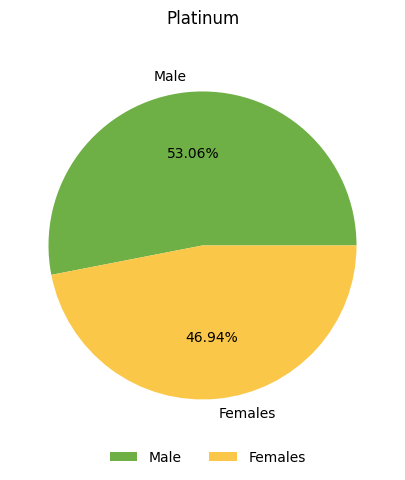

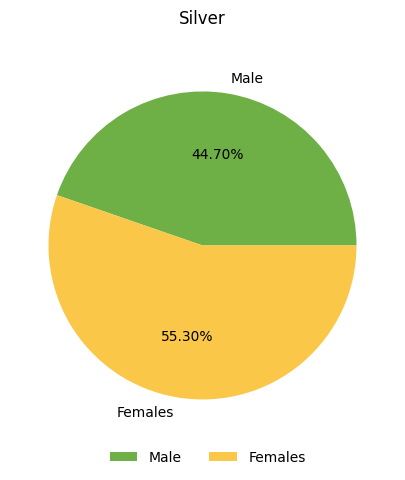

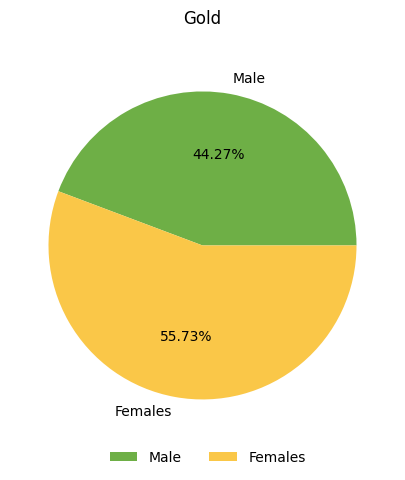

In [48]:
segments = subset_1['Segment'].unique()

for segment_name in segments:
    segment_by_gender_1 = subset_1.loc[subset_1['Segment'] == segment_name, :].groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
    fields = ['Male', 'Females']
    print('\n')
    segment_by_gender_1['ttl'] = segment_by_gender_1['claim_amount']
    segment_by_gender_1 = segment_by_gender_1
    
    colors = ['#6EAF46', '#FAC748']
    title = segment_name + '\n'    
    
    def basic_pie_plot(df, labels, colors, title):
        print('\n\n')
        
        fig, ax = plt.subplots(figsize = (10, 5))
        ax.pie(df['ttl'], 
               labels = labels, 
               colors = colors, 
               autopct = '%2.2f%%')
        
        plt.title(title, loc = 'center')
        plt.legend(labels, bbox_to_anchor = ([-1, 0.25, 1.8, -0.25]), ncol = 4, frameon = False)
        plt.show()
        
        
        
    basic_pie_plot(segment_by_gender_1, fields, colors, title)
    
    


<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Visualizing insurance claims by driver related issues:</b> Among males and females, which gender had claimed the most for any type of driver related issues? (This metric can be compared using a bar chart).<br>
    </p>
    <br>
    </div>
</div>

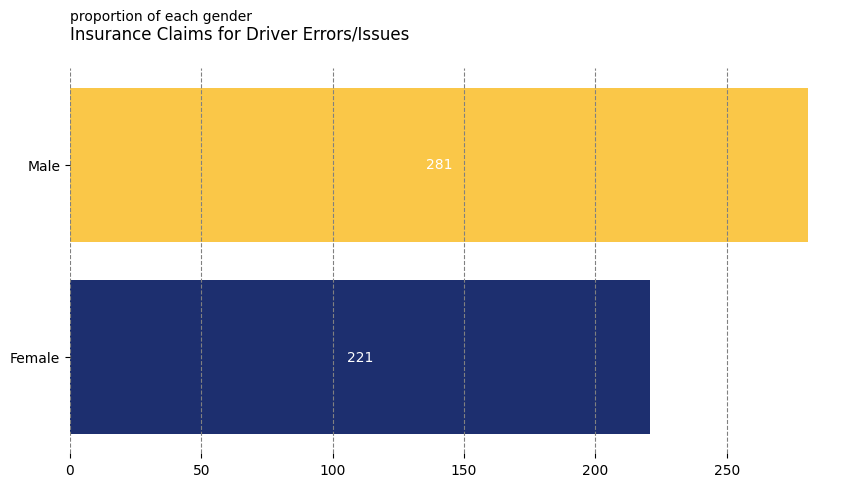

In [49]:
df1 = subset_1.loc[(subset_1.incident_cause.str.lower().str.contains("driver"))]\
                .groupby("gender")['customer_id'].count()
df1 = pd.DataFrame(df1)
df1 = df1.rename(columns = {"customer_id":"total"})

fields = df1.columns



colors = ['#1D2F6F',  '#FAC748']
title = "Insurance Claims for Driver Errors/Issues\n"
subtitle = "proportion of each gender" 

def basic_stack_bar_plot(df, colors, title, subtitle):
    fig, ax = plt.subplots(figsize = (10, 5))
    
    for name in fields:
        ax.barh(df.index, df[name], color = ['#1D2F6F',  '#FAC748'])
        ax.bar_label(ax.containers[-1], label_type = 'center', color = 'white')

        
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
    ax.xaxis.grid(color = 'gray', linestyle = 'dashed')
    
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    plt.title(title, loc = 'left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
        
    plt.show()
    
basic_stack_bar_plot(df1, colors, title, subtitle)

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Visualizing fraudulent claims by various age groups:</b> maximum fraudulent policy claims (This metric can be compared using a bar chart).<br>
    </p>
    <br>
    </div>
</div>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Important Observation:</b> Variable <b>Age</b> dependent on <b>DateOfBirth</b> is a <b>Slow Changing Dimension</b>, therefore some age groups might be excluded from the result set.<br>
    </p>
    <br>
    </div>
</div>

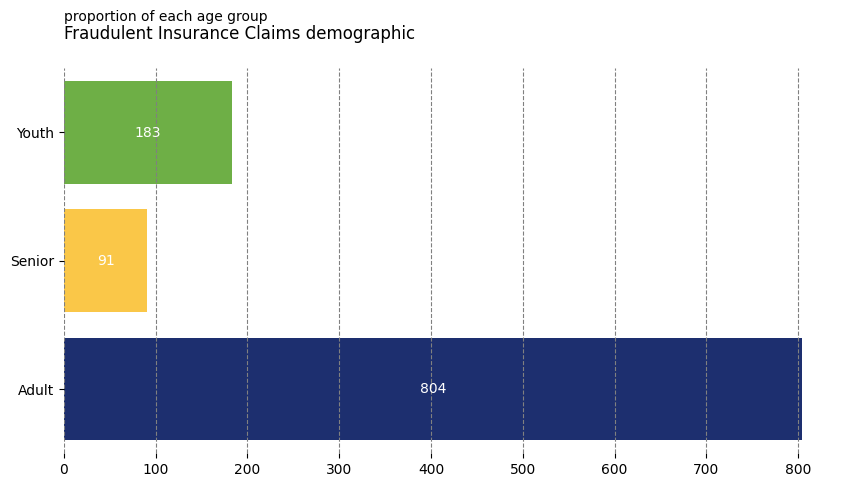

In [50]:
df1 = subset_1.groupby("age_group")["fraudulent"].count().reset_index()
df1 = pd.DataFrame(df1).set_index('age_group')
df1 = df1.rename(columns = {"fraudulent":"fraudulent_claims"})

fields = df1.columns

colors = ['#1D2F6F',  '#FAC748', '#6EAF46']
title = "Fraudulent Insurance Claims demographic\n"
subtitle = "proportion of each age group" 

def basic_stack_bar_plot(df, colors, title, subtitle):
    fig, ax = plt.subplots(figsize = (10, 5))
    
    for name in fields:
        ax.barh(df.index, df[name], color = ['#1D2F6F',  '#FAC748', '#6EAF46'])
        ax.bar_label(ax.containers[-1], label_type = 'center', color = 'white')

        
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
    ax.xaxis.grid(color = 'gray', linestyle = 'dashed')        
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    plt.title(title, loc = 'left')
    plt.text(0, ax.get_yticks()[-1] + 0.87, subtitle)   
    plt.show()
    
basic_stack_bar_plot(df1, colors, title, subtitle)

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Visualizing Monthly Trend :</b> total amount that has been claimed
by the customers.<br>
    </p>
    <br>
    </div>
</div>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Visualizing Method-1:</b> Trend Lines<br>
    </p>
    <br>
    </div>
</div>

In [52]:
from matplotlib import dates as mdates

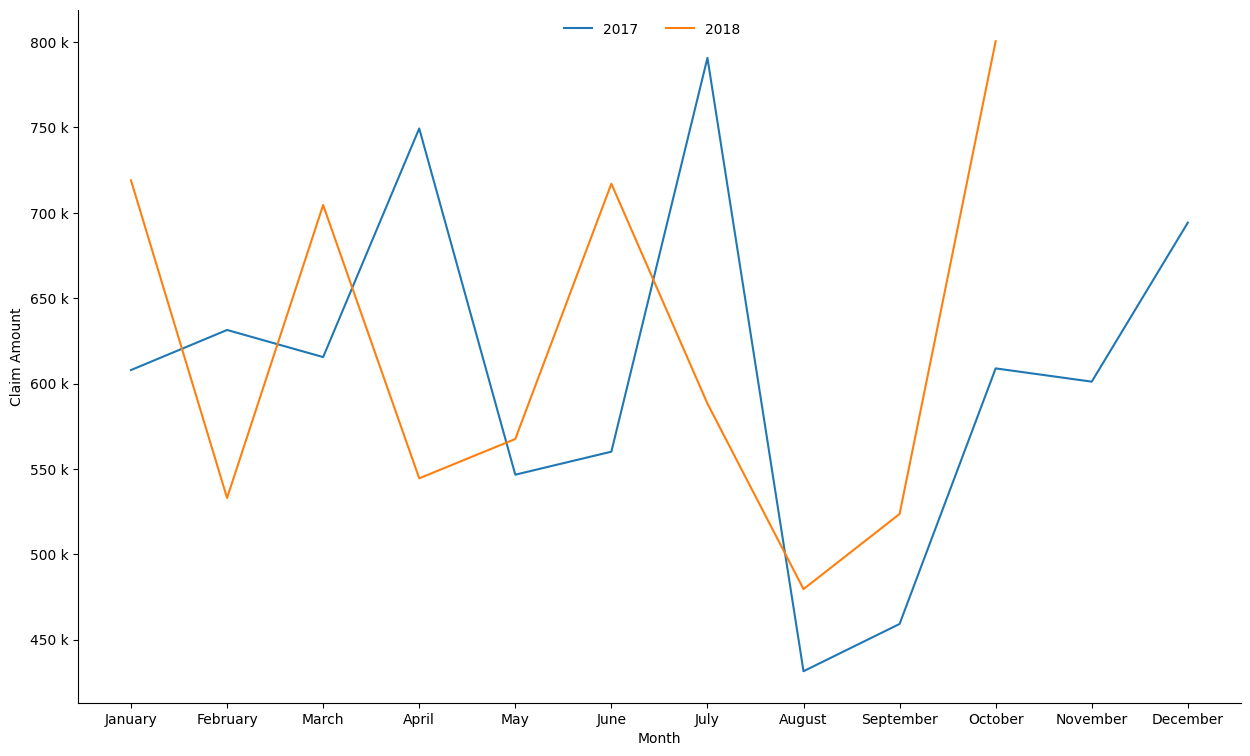

In [53]:
monthly_claim_subset = subset_1[['claim_date', 'claim_amount']].set_index('claim_date')
monthly_claim_subset = monthly_claim_subset.resample('1ME').sum()
monthly_claim_subset['Year'] = monthly_claim_subset.index.year
monthly_claim_subset['month_of_year'] = monthly_claim_subset.index.month
monthly_claim_subset.index = monthly_claim_subset.index.month_name()
monthly_claim_subset = monthly_claim_subset.reset_index()
monthly_claim_subset = monthly_claim_subset.pivot_table(
                                                        index = monthly_claim_subset['month_of_year'], 
                                                        columns = ['Year'], 
                                                        values = 'claim_amount',
                                                        sort = True
                                                        ).reset_index()
monthly_claim_subset['month_name'] = pd.to_datetime(monthly_claim_subset['month_of_year'], format = '%m').dt.month_name()
monthly_claim_subset = monthly_claim_subset.loc[:, "month_of_year":"month_name"]
m1 = monthly_claim_subset[['month_name', 2017, 2018]].T.reset_index()

m1 = m1.set_index('Year')
column_names = m1.iloc[0, 0:]
m1.columns = m1.iloc[0, 0:]
m1 = m1.iloc[1:, 0:]
m1 = m1.T
#m1 = m1.fillna(m1.mean())

fig, ax = plt.subplots(figsize = (15, 9))
ax.plot(m1.index, m1[[2017, 2018]])
ax.set(xlabel = "Month", 
       ylabel = "Claim Amount")
ax.spines[['top', 'right']].set_visible(False)
ax.yaxis.set_major_formatter(ticks.EngFormatter())
plt.legend(m1.columns, bbox_to_anchor = ([0.58, 1, 0, 0]), ncol = 4, frameon = False)
plt.show()

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Visualizing Method-2:</b> Stack Bar Graph | Comparison of amount claimed on monthly basis.<br>
    </p>
    <br>
    </div>
</div>

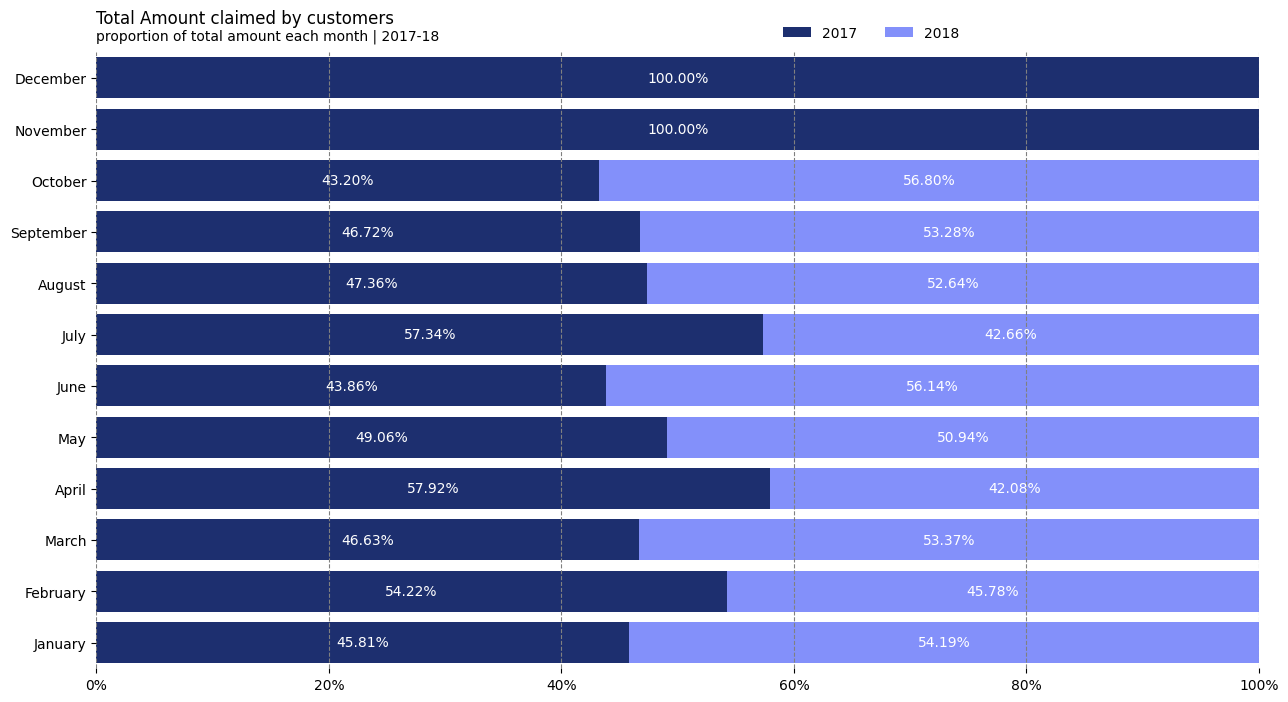

In [54]:
monthly_claim_subset = subset_1[['claim_date', 'claim_amount']].set_index('claim_date')
monthly_claim_subset = monthly_claim_subset.resample('1ME').sum()
monthly_claim_subset['Year'] = monthly_claim_subset.index.year
monthly_claim_subset['month_of_year'] = monthly_claim_subset.index.month
monthly_claim_subset.index = monthly_claim_subset.index.month_name()
monthly_claim_subset = monthly_claim_subset.reset_index()
monthly_claim_subset = monthly_claim_subset.pivot_table(
                                                        index = monthly_claim_subset['month_of_year'], 
                                                        columns = ['Year'], 
                                                        values = 'claim_amount',
                                                        sort = True
                                                        ).reset_index()
monthly_claim_subset['month_name'] = pd.to_datetime(monthly_claim_subset['month_of_year'], format = '%m').dt.month_name()
monthly_claim_subset = monthly_claim_subset.loc[:, "month_of_year":"month_name"]

m1 = monthly_claim_subset[['month_name', 2017, 2018]].T.reset_index()
m1 = m1.set_index('Year')
column_names = m1.iloc[0, 0:]
m1.columns = m1.iloc[0, 0:]
m1 = m1.iloc[1:, 0:]
m1 = m1.T
#m1 = m1.fillna(m1.mean())

fields = m1.columns
m1 ['total'] = m1.sum(axis = 1)
for col in fields:
    m1[col] = (m1[col]/m1['total'])*100
    
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
title = "Total Amount claimed by customers\n"
subtitle = "proportion of total amount each month | 2017-18"   


def basic_stackbar_plot(df, labels, colors, title, subtitle):
    left = len(df) * [0]
    fig, ax = plt.subplots(figsize = (15, 8))
    
    for idx, name in enumerate(fields):
        ax.barh(df.index, 
                df[name], 
                left = left, color = colors[idx])
        
        ax.bar_label(ax.containers[-1], label_type = 'center', fmt = '%.2f%%', color = 'white')
        
        left = left + df[name]
        
    
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
    
    ax.xaxis.grid(color = 'gray', linestyle = 'dashed')
    ax.xaxis.set_major_formatter(ticks.StrMethodFormatter("{x:,.0f}%"))
    
    plt.title(title, loc = 'left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
    plt.legend(labels, bbox_to_anchor = ([0.58, 1, 0, 0]), ncol = 4, frameon = False)
    
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    
    plt.show()
    
    
basic_stackbar_plot(m1, fields, colors, title, subtitle)

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Deeper Insights:</b>  average claim amount for gender and age categories, for both fraudulent claims and non-fraudulent claims.<br>
    </p>
    <br>
    </div>
</div>

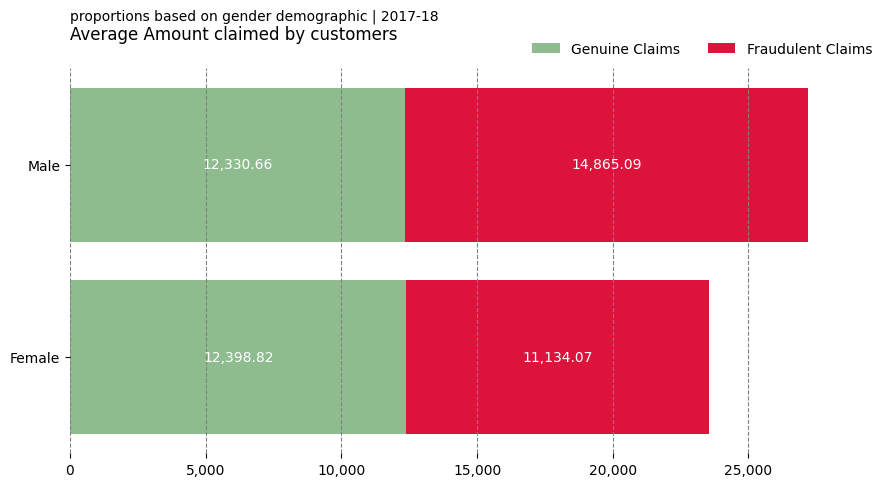

In [55]:
gender_group = subset_1[['gender', 'fraudulent', 'claim_amount']]
gender_group = gender_group.pivot_table(index = 'gender', columns = ['fraudulent'], values = 'claim_amount', aggfunc = 'mean')
fields = gender_group.columns
gender_group = gender_group.reset_index()
gender_group = gender_group.set_index('gender')

colors = ['darkseagreen', 'crimson']
title = "Average Amount claimed by customers\n"
subtitle = "proportions based on gender demographic | 2017-18"   


def basic_stackbar_plot(df, labels, colors, title, subtitle):
    left = len(df) * [0]
    fig, ax = plt.subplots(figsize = (10, 5))
    
    for idx, name in enumerate(fields):
        ax.barh(df.index, 
                df[name], 
                left = left, color = colors[idx])
        
        ax.bar_label(ax.containers[-1], label_type = 'center', fmt = '{:,.2f}', color = 'white')
        
        left = left + df[name]

    
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
    
    ax.xaxis.grid(color = 'gray', linestyle = 'dashed')
    ax.xaxis.set_major_formatter(ticks.StrMethodFormatter("{x:,.0f}"))
    
    plt.title(title, loc = 'left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
    plt.legend(labels, bbox_to_anchor = ([0.58, 1, 0, 0]), ncol = 4, frameon = False)
    
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)

    
    plt.show()
    
    
basic_stackbar_plot(gender_group, ['Genuine Claims', 'Fraudulent Claims'], colors, title, subtitle)

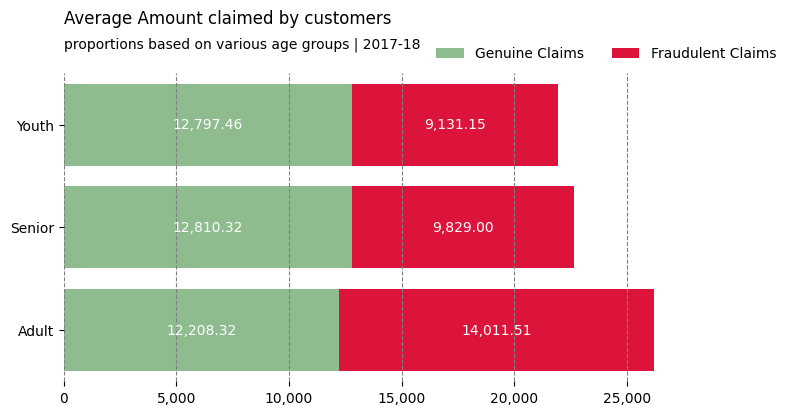

In [56]:
age_demographic = subset_1[['age_group', 'fraudulent', 'claim_amount']]
age_demographic = age_demographic.pivot_table(index = 'age_group', columns = ['fraudulent'], values = 'claim_amount', aggfunc = 'mean')
fields = age_demographic.columns
age_demographic = age_demographic.reset_index()
age_demographic = age_demographic.set_index('age_group')

colors = ['darkseagreen', 'crimson']
title = "Average Amount claimed by customers\n\n"
subtitle = "proportions based on various age groups | 2017-18"   


def basic_stackbar_plot(df, labels, colors, title, subtitle):
    left = len(df) * [0]
    fig, ax = plt.subplots(figsize = (8, 4))
    
    for idx, name in enumerate(fields):
        ax.barh(df.index, 
                df[name], 
                left = left, color = colors[idx])
        
        ax.bar_label(ax.containers[-1], label_type = 'center', fmt = '{:,.2f}', color = 'white')
        
        left = left + df[name]
        
    
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
    
    ax.xaxis.grid(color = 'gray', linestyle = 'dashed')
    ax.xaxis.set_major_formatter(ticks.StrMethodFormatter("{x:,.0f}"))
    
    plt.title(title, loc = 'left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
    plt.legend(labels, bbox_to_anchor = ([0.58, 1, 0, 0]), ncol = 4, frameon = False)
    
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    
    plt.show()
    
    
basic_stackbar_plot(age_demographic, ['Genuine Claims', 'Fraudulent Claims'], colors, title, subtitle)

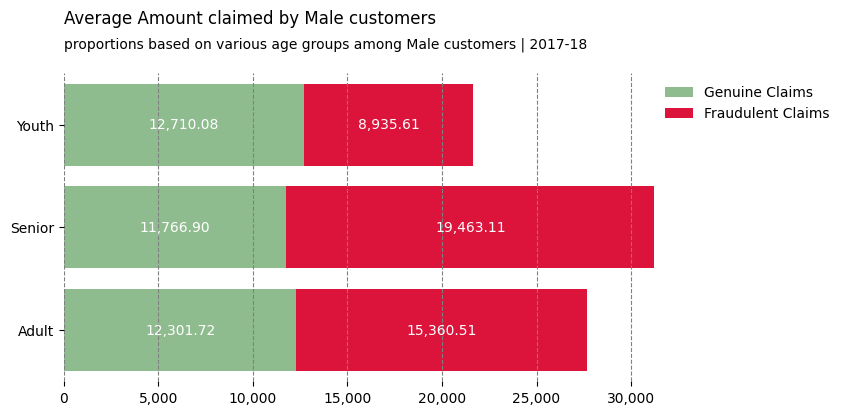

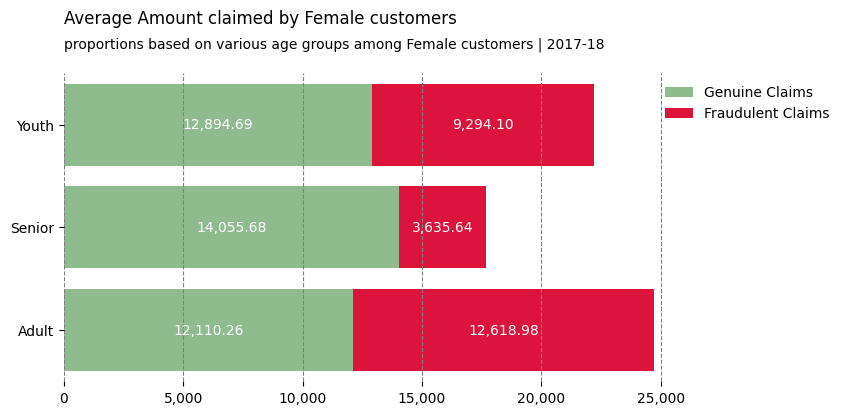

In [57]:
s1 = subset_1[['age_group', 'gender', 'fraudulent', 'claim_amount']]
gender_mask_female = (s1['gender'] == 'Female')
s1 = s1.loc[gender_mask_female, ['age_group', 'fraudulent', 'claim_amount']]
age_demographic = s1[['age_group', 'fraudulent', 'claim_amount']]
age_demographic = age_demographic.pivot_table(index = 'age_group', columns = ['fraudulent'], values = 'claim_amount', aggfunc = 'mean')
fields = age_demographic.columns
age_demographic = age_demographic.reset_index()
age_demographic = age_demographic.set_index('age_group')

s2 = subset_1[['age_group', 'gender', 'fraudulent', 'claim_amount']]
gender_mask_male = (s2['gender'] == 'Male')
s2 = s2.loc[gender_mask_male, ['age_group', 'fraudulent', 'claim_amount']]
age_demographic2 = s2[['age_group', 'fraudulent', 'claim_amount']]
age_demographic2 = age_demographic2.pivot_table(index = 'age_group', columns = ['fraudulent'], values = 'claim_amount', aggfunc = 'mean')
fields = age_demographic2.columns
age_demographic2 = age_demographic2.reset_index()
age_demographic2 = age_demographic2.set_index('age_group')

colors = ['darkseagreen', 'crimson']
title_male = "Average Amount claimed by Male customers\n\n"
subtitle_male = "proportions based on various age groups among Male customers | 2017-18"

title_female = "Average Amount claimed by Female customers\n\n"
subtitle_female = "proportions based on various age groups among Female customers | 2017-18"   


def basic_stackbar_plot(df, labels, colors, title, subtitle):
    left = len(df) * [0]
    fig, ax = plt.subplots(figsize = (8, 4))
    
    for idx, name in enumerate(fields):
        ax.barh(df.index, 
                df[name], 
                left = left, color = colors[idx])
        
        ax.bar_label(ax.containers[-1], label_type = 'center', fmt = '{:,.2f}', color = 'white')
        
        left = left + df[name]
        
    
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
    
    ax.xaxis.grid(color = 'gray', linestyle = 'dashed')
    ax.xaxis.set_major_formatter(ticks.StrMethodFormatter("{x:,.0f}"))
    
    plt.title(title, loc = 'left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
    plt.legend(labels, bbox_to_anchor = ([0.95, 1, 0, 0]), frameon = False)
    
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    
    plt.show()
    print('\n')
    
    
def gender_demo(f1, f2):
    return f1
    return '\n\n'
    return f2

gender_demo(
            basic_stackbar_plot(age_demographic2, ['Genuine Claims', 'Fraudulent Claims'], colors, title_male, subtitle_male), 
            basic_stackbar_plot(age_demographic, ['Genuine Claims', 'Fraudulent Claims'], colors, title_female, subtitle_female)
            )

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(243, 116, 99);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Context</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(232, 219, 217);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>BACKGROUND:</b> Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements. <br><br>
        <b>BUSINESS PROBLEM:</b><br>
        Using data which has been provided to us, we will now answer the following hypothetical questions:
        <br>
        <br>
        <b>a.</b> Is there any similarity in the amount claimed by males and females?<br><br>
        <b>b.</b> Is there any relationship between age category and segment?<br><br>
        <b>c.</b> The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was '10,000 USD'.<br><br>
        <b>d.</b> Is there any difference between age groups and insurance claims?<br><br>
        <b>e.</b> Is there any relationship between total number of policy claims and the
claimed amount?
    </p>
    <br>
    </div>
</div>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>a.</b> Is there any similarity in the amount claimed by males and females?<br>
    </p>
    <br>
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Approach</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        Even though the problem seems simple on the surface, the context of this problem goes a step further which makes it a little complex. That being said, there are two types of claims: <b>"Fraudulent Claims"</b> and <b>"Non-Fraudulent Claims"</b>,
at the same time there are two genders. So, there are multiple ways to aproach this problem, we will be using the following tests to arrive at a conclusion:
        <br>
        <br>
        <b>Independent T-Test (Single-tailed):</b> To test statistical significance between two variables, For Genuine Claims only.
        <br><br>$$t = \frac{\bar{x_1}-\bar{x_2}} {\sqrt{(s_1^2n_1 + s_2^2n_2)}}$$<br>
        <b>Independent T-Test (Two-tailed):</b> To test statistical significance between two variables for both types of claims.
        <br><br>$$t = \frac{\bar{x_1}-\bar{x_2}} {\sqrt{\frac{s_1^2} n_1  + \frac{s_2^2} n_2}}$$<br>
        <br>
        <br>
        <b>F-Test/ANOVA (One-way):</b> To judge whether several sample means are all equal and belong to same population.
        <br><br>$$F = \frac{MST} {MSE}$$<br>
        <br>with degrees of freedom, $$df_1 = K - 1$$
        <br>$$df_2 = n - K$$
    </p>
    <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: 2rem;
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>Using variables - "gender(Male -OR- Female)" and "claim_amount"</b><br><br> at $\alpha = 0.05,$ 
            <br>$$H_0: \mu_1 = \mu_2 = \mu_3 = .... \mu_k$$
            <br>$$H_A: \mu_1 <> \mu_2 <> \mu_3 <> .... \mu_k$$
            <br>$$-OR-$$
            <br>$$H_A: \mu_1 = \mu_2 = \mu_3 <> .... \mu_k$$
    </p>
    <br>
    <br>
    </div>
</div>

In [58]:
gender_male = subset_1.loc[subset_1['gender'] == 'Male', 'claim_amount'] 
gender_female = subset_1.loc[subset_1['gender'] == 'Female', 'claim_amount']

t_score = stats.ttest_ind(gender_male, gender_female, alternative = 'greater')
p_value_exact = ("{:-.100f}".format(t_score[1]))
p_value_expo = t_score[1]
t_score_critical = t_score[0]
print("\033[1mTest results:\033[0m For both types of claims")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mT-Score:\033[0m", t_score_critical)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))

Test results: For both types of claims

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

T-Score: 0.9626244454792698
P-value exact: 0.1679761509747082492971514966484392061829566955566406250000000000000000000000000000000000000000000000
P-value exponential: 0.16797615097470825

Failed to reject null hypothesis.

--------------------------------------------------------|| END ||---------------------------------------------------------


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
<b>Testing for Similarities:</b> Testing hypothesis for both 'Fraudulent' and 'Non-Fraudulent' claims by each genders.<br>
    </p>
    <br>
    </div>
</div>

In [59]:
gender_subset_3 = subset_1.loc[subset_1['fraudulent'] == 'Yes', ['gender', 'claim_amount']]
gender_subset_4 = subset_1.loc[subset_1['fraudulent'] == 'No', ['gender', 'claim_amount']]

In [60]:
genuine_claims = gender_subset_4
genuine_claims = genuine_claims.rename(columns = {'claim_amount' : 'genuine_claim_amount'})
gender_male = genuine_claims.loc[subset_1['gender'] == 'Male', 'genuine_claim_amount'] 
gender_female = genuine_claims.loc[subset_1['gender'] == 'Female', 'genuine_claim_amount']

t_score = stats.ttest_ind(gender_male, gender_female, alternative = 'less')
p_value_exact = ("{:-.100f}".format(t_score[1]))
p_value_expo = t_score[1]
t_score_critical = t_score[0]
print("\033[1mTest results:\033[0m For Genuine Claims")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mT-Score:\033[0m", t_score_critical)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))
print('\n\n')

fraudulent_claims = gender_subset_3
fraudulent_claims = fraudulent_claims.rename(columns = {'claim_amount' : 'fraudulent_claim_amount'})

gender_male = fraudulent_claims.loc[subset_1['gender'] == 'Male', 'fraudulent_claim_amount'] 
gender_female = fraudulent_claims.loc[subset_1['gender'] == 'Female', 'fraudulent_claim_amount']

t_score = stats.ttest_ind(gender_male, gender_female, alternative = 'greater')
p_value_exact = ("{:-.100f}".format(t_score[1]))
p_value_expo = t_score[1]
t_score_critical = t_score[0]
print("\033[1mTest results:\033[0m For Fraudulent Claims")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mT-Score:\033[0m", t_score_critical)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))

Test results: For Genuine Claims

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

T-Score: -0.07667298977331174
P-value exact: 0.4694510738838577057485679233650444075465202331542968750000000000000000000000000000000000000000000000
P-value exponential: 0.4694510738838577

Failed to reject null hypothesis.

--------------------------------------------------------|| END ||---------------------------------------------------------



Test results: For Fraudulent Claims

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

T-Score: 1.9443726577400844
P-value exact: 0.0265022636152092289085757670363818760961294174194335937500000000000000000000000000000000000000000000
P-value exponential: 0.02650226361520923

Reject null hypothesis.

--------------------------------------------------------|| END ||-----------------------------------------------------

In [61]:
purpose_corr = stats.f_oneway(
            genuine_claims.loc[subset_1['gender'] == 'Male', 'genuine_claim_amount'],
            genuine_claims.loc[subset_1['gender'] == 'Female', 'genuine_claim_amount'],
            fraudulent_claims.loc[subset_1['gender'] == 'Male', 'fraudulent_claim_amount'],
            fraudulent_claims.loc[subset_1['gender'] == 'Female', 'fraudulent_claim_amount']
)

p_value_exact = ("{:-.100f}".format(purpose_corr[1]))
p_value_expo = purpose_corr[1]
f_score_critical = purpose_corr[0]
print("\033[1mTest results:\033[0m For both fraudulent Claims and Genuine Claims")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mF-Score:\033[0m", f_score_critical)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))

Test results: For both fraudulent Claims and Genuine Claims

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

F-Score: 1.7225959651025682
P-value exact: 0.1606007637108698149486230022375821135938167572021484375000000000000000000000000000000000000000000000
P-value exponential: 0.16060076371086981

Failed to reject null hypothesis.

--------------------------------------------------------|| END ||---------------------------------------------------------


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 201, 20);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Conclusion</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
                <b>Independent Single-tailed T-Test results (For Genuine claims):</b><br>
        <br>$$ t = -0.07667298977331174 $$
        <br>$$ p = 0.4694510738838577 $$
        <br>$$\alpha = 0.05 $$
        <br>Since $p > \alpha$, We fail to reject the $H_0$.
        </p>
        <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <br>
        <b>Independent Two-tailed T-Test results (For Fraudulent claims):</b><br>
        <br>$$ t = 1.9443726577400844 $$
        <br>$$ p = 0.02650226361520923 $$
        <br>$$\alpha = 0.05 $$
        <br>Since $p < \alpha$, We reject the $H_0$.
        </p>
        <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>Independent Two-tailed T-Test results (Both types of claims):</b><br>
        <br>$$ t = 0.9626244454792698 $$
        <br>$$ p = 0.16797615097470825 $$
        <br>$$\alpha = 0.05 $$
        <br>Since $p > \alpha$, We fail to reject the $H_0$.
        <br>
        </p>
        <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <br>
        <br>
        <b>ANOVA Results:</b>
        <br>$$ F = 1.7225959651025682 $$
        <br>$$ p = 0.16060076371086981 $$
        <br>$$\alpha = 0.05 $$
        <br>Since $p > \alpha$, We fail to reject the $H_0$.
        <br>
        </p>
        <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>STATEMENT:</b><br>
        Based on test results, it is appropriate to say there are no similarities between amount claimed by male and female customers, exceptional case being the Fraudulent Claims, the ONLY comparison where we saw some similarities between male and female customer claims.
    </p>
    <br>
    </div>
</div>

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>b.</b> Is there any relationship between age category and segment?<br>
    </p>
    <br>
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Approach</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        The context of this problem demands a comparison between two samples with different sizes, that not only 
        are categorical, but also independent in nature.
        <br>
        <br>
        <b>Chi-Square test of Independence:</b> <br>
        1. To test if variables are related, associated, contingent, or dependent.<br>
        2. To test statistical significance between two categorical variables.
        <br><br>$$X^2 = \sum\frac{{(O_i - E_i)^2}} {E_i}$$<br>
    </p>
    <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: 2rem;
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>Using variables - "age_group" and "Segment"</b><br><br> at $\alpha = 0.05,$ 
            <br>$$H_0: r = 0$$
            <br>$$H_A: r = ({Segment}, {age  group})$$
            <br>$$-OR-$$
            <br>$$H_A: r = ({X_1^2}, {X_2^2})$$
    </p>
    <br>
    <br>
    </div>
</div>

In [62]:
product_segement = pd.DataFrame(subset_1[['Segment', 'age_group', 'customer_id']]\
                                .groupby(['Segment', 'age_group'])['customer_id']\
                                .agg('count'))\
                                .reset_index()

product_segement = product_segement.pivot_table(index = 'Segment', columns = 'age_group', values = 'customer_id')

for column_name in product_segement.columns:
    product_segement[column_name] = product_segement[column_name].apply(lambda x: int(x))
    
product_segement

age_group,Adult,Senior,Youth
Segment,,,
Gold,276,35,60
Platinum,271,30,60
Silver,257,26,63


In [63]:
test_result = stats.chi2_contingency(product_segement)
p_value_exact = ("{:-.100f}".format(test_result[1]))
p_value_expo = test_result[1]
chi_score = test_result[0]
print("\033[1mTest results:\033[0m")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mChi-score:\033[0m", chi_score)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))

Test results:

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

Chi-score: 1.287452103916536
P-value exact: 0.8635008437470541586833405744982883334159851074218750000000000000000000000000000000000000000000000000
P-value exponential: 0.8635008437470542

Failed to reject null hypothesis.

--------------------------------------------------------|| END ||---------------------------------------------------------


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 201, 20);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Conclusion</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px;
                position: relative;
               ">
        <b>RESULTS:</b>
        <br>$$ X^2 = 1.287452103916536 $$
        <br>$$ p = 0.8635008437470542 $$
        <br>
        <br>Since $p > \alpha$ We fail to reject the $H_0$.
        <br>
        <br>
        <b>STATEMENT:</b><br>
        There is no relationship between the two variables.
    </p>
    <br>
    </div>
</div>

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>c.</b> The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was 10,000 USD.<br>
    </p>
    <br>
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Approach</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        Here, we are specifically looking to see if there is evidence to support the claim that there is an increment in amount for insurance claims.
        <br>
        <br>
<b>One Sample T-Test (Two-tailed):</b> To test statistical significance of given variable, against hypothesized value.
        <br><br>$$t = \frac{(\bar{x}-\mu)} {S/\sqrt n}$$<br>    </p>
    <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>Using variables - "claim_amount" and "claim_date"</b><br><br> at $\alpha = 0.05,$ 
            <br>$$H_0: \mu <= 10,000 $$
            <br>$$H_A: \mu > 10,000 $$
            <br>
    </p>
    <br>
    <br>
    </div>
</div>

In [64]:
stats.ttest_ind(subset_1.loc[subset_1['claim_date'].dt.year == 2017, 'claim_amount'], 10000, alternative = 'less')


t_score = stats.ttest_1samp(subset_1.loc[:, 'claim_amount'], 10000, alternative = 'greater')
p_value_exact = ("{:-.100f}".format(t_score[1]))
p_value_expo = t_score[1]
t_score_critical = t_score[0]
print("\033[1mTest results:\033[0m Year 2017")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mT-Score:\033[0m", t_score_critical)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))

Test results: Year 2017

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

T-Score: 6.141221086753917
P-value exact: 0.0000000005750690916664789452974713674195724605331392353946284856647253036499023437500000000000000000
P-value exponential: 5.750690916664789e-10

Reject null hypothesis.

--------------------------------------------------------|| END ||---------------------------------------------------------


In [65]:
stats.ttest_ind(subset_1.loc[subset_1['claim_date'].dt.year == 2018, 'claim_amount'], 10000, alternative = 'less')


t_score = stats.ttest_1samp(subset_1.loc[:, 'claim_amount'], 10000, alternative = 'greater')
p_value_exact = ("{:-.100f}".format(t_score[1]))
p_value_expo = t_score[1]
t_score_critical = t_score[0]
print("\033[1mTest results:\033[0m Year 2018")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mT-Score:\033[0m", t_score_critical)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))

Test results: Year 2018

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

T-Score: 6.141221086753917
P-value exact: 0.0000000005750690916664789452974713674195724605331392353946284856647253036499023437500000000000000000
P-value exponential: 5.750690916664789e-10

Reject null hypothesis.

--------------------------------------------------------|| END ||---------------------------------------------------------


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 201, 20);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Conclusion</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>RESULTS:</b>
        <br>$$ t_1 = 6.141221086753917 $$
        <br>$$ t_2 = 6.141221086753917 $$
        <br>$$ p_1 = 5.750690916664789e^{-10} $$
        <br>$$ p_2 = 5.750690916664789e^{-10} $$
        <br>$$\alpha = 0.05 $$
        <br>Since $p_1 < \alpha$ and $p_2 < \alpha$ We reject the $H_0$.
        <br>
        <br>
        <b>STATEMENT:</b><br>
        Based on the data provided, we can conclude there has been an increase in insurance claim amount.
    </p>
    <br>
    </div>
</div>

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>d.</b> Is there any difference between age groups and insurance claims?<br>
    </p>
    <br>
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Approach</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        Different "age groups" implies multiple samples, -or- more than two samples.
        <br>
        <br>
        <b>F-Test/ANOVA (One-way):</b> To judge whether several sample means are all equal and belong to same population.
        <br><br>$$F = \frac{MST} {MSE}$$<br>
        <br>with degrees of freedom, $$df_1 = K - 1$$
        <br>$$df_2 = n - K$$
    </p>
    <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>Using variables - "age_groups" and "claim_amount"</b><br><br> at $\alpha = 0.05,$ 
            <br>$$H_0: \mu_1 = \mu_2 = \mu_3 = .... \mu_k$$
            <br>$$H_A: \mu_1 <> \mu_2 <> \mu_3 <> .... \mu_k$$
            <br>$$-OR-$$
            <br>$$H_A: \mu_1 = \mu_2 = \mu_3 <> .... \mu_k$$
    </p>
    <br>
    <br>
    </div>
</div>

In [66]:
age_demographic = []
for age in subset_1['age_group'].unique():
    age_demographic.append(subset_1.loc[(subset_1['age_group'] == age), 'claim_amount'])
    
purpose_corr = stats.f_oneway(age_demographic[0], age_demographic[1], age_demographic[2])

p_value_exact = ("{:-.100f}".format(purpose_corr[1]))
p_value_expo = purpose_corr[1]
f_score_critical = purpose_corr[0]
print("\033[1mTest results:\033[0m")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+20, "-"))
print("")
print("\033[1mF-Score:\033[0m", f_score_critical)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+20, "-"))

Test results:

-------------------------------------------------------|| BEGIN ||--------------------------------------------------------

F-Score: 0.1569252653384082
P-value exact: 0.8547875142149401472835279491846449673175811767578125000000000000000000000000000000000000000000000000
P-value exponential: 0.8547875142149401

Failed to reject null hypothesis.

--------------------------------------------------------|| END ||---------------------------------------------------------


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 201, 20);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Conclusion</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>RESULTS:</b>
        <br>$$ F = 0.1569252653384082 $$
        <br>$$ p = 0.8547875142149401 $$
        <br>$$\alpha = 0.05 $$
        <br>Since $p > \alpha$, We fail to reject the $H_0$.
        <br>
        <br>
        <b>STATEMENT:</b><br>
        Based on test results, it can be concluded that there is little difference between insurance claim amount by different age groups.
    </p>
    <br>
    </div>
</div>

<br></br>
<br></br>
<br></br>

<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="
            webkit-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            moz-box-shadow: 10px 10px 0px 0px rgba(0,0,0,0.52);
            box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 300, 10);">
    <br>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>e.</b> Is there any relationship between total number of policy claims and the
claimed amount?<br>
    </p>
    <br>
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;">Approach</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        Variation in count of policy claims implies multiple samples, -or- more than two samples.
        <br>
        <br>
        <b>F-Test/ANOVA (One-way):</b> To judge whether several sample means are all equal and belong to same population.
        <br><br>$$F = \frac{MST} {MSE}$$<br>
        <br>with degrees of freedom, $$df_1 = K - 1$$
        <br>$$df_2 = n - K$$
    </p>
    <br>
        <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(219, 242, 188);
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>Using variables - "total_policy_claims" and "claim_amount"</b><br><br> at $\alpha = 0.05,$ 
            <br>$$H_0: \mu_1 = \mu_2 = \mu_3 = .... \mu_k$$
            <br>$$H_A: \mu_1 <> \mu_2 <> \mu_3 <> .... \mu_k$$
            <br>$$-OR-$$
            <br>$$H_A: \mu_1 = \mu_2 = \mu_3 <> .... \mu_k$$
    </p>
    <br>
    <br>
    </div>
</div>

In [67]:
claim_count = pd.DataFrame(subset_1.loc[:, ['total_policy_claims']])

amount = pd.DataFrame(subset_1.loc[:, ['total_policy_claims', 'claim_amount']])
amount = amount.rename(columns = {'claim_amount' : 'total_amount'})

In [68]:
group_1 = amount.loc[amount['total_policy_claims'] == 1, 'total_amount']
group_2 = amount.loc[amount['total_policy_claims'] == 2, 'total_amount']
group_3 = amount.loc[amount['total_policy_claims'] == 3, 'total_amount']
group_4 = amount.loc[amount['total_policy_claims'] == 4, 'total_amount']
group_5 = amount.loc[amount['total_policy_claims'] == 5, 'total_amount']
group_6 = amount.loc[amount['total_policy_claims'] == 6, 'total_amount']
group_7 = amount.loc[amount['total_policy_claims'] == 7, 'total_amount']
group_8 = amount.loc[amount['total_policy_claims'] == 8, 'total_amount']

In [69]:
print('Claims made: \033[1m1\033[0m  Average amount claimed:', '\033[1m' + str(group_1.mean()) + '\033[0m', '\n')
print('Claims made: \033[1m2\033[0m  Average amount claimed:', '\033[1m' + str(group_2.mean()) + '\033[0m', '\n')
print('Claims made: \033[1m3\033[0m  Average amount claimed:', '\033[1m' + str(group_3.mean()) + '\033[0m', '\n')
print('Claims made: \033[1m4\033[0m  Average amount claimed:', '\033[1m' + str(group_4.mean()) + '\033[0m', '\n')
print('Claims made: \033[1m5\033[0m  Average amount claimed:', '\033[1m' + str(group_5.mean()) + '\033[0m', '\n')
print('Claims made: \033[1m6\033[0m  Average amount claimed:', '\033[1m' + str(group_6.mean()) + '\033[0m', '\n')
print('Claims made: \033[1m7\033[0m  Average amount claimed:', '\033[1m' + str(group_7.mean()) + '\033[0m', '\n')
print('Claims made: \033[1m8\033[0m  Average amount claimed:', '\033[1m' + str(group_8.mean()) + '\033[0m', '\n')

Claims made: 1  Average amount claimed: 12519.253485424588 

Claims made: 2  Average amount claimed: 13765.521142857142 

Claims made: 3  Average amount claimed: 12629.424470588234 

Claims made: 4  Average amount claimed: 11106.921355932203 

Claims made: 5  Average amount claimed: 8530.254074074073 

Claims made: 6  Average amount claimed: 14286.768 

Claims made: 7  Average amount claimed: 23033.0 

Claims made: 8  Average amount claimed: 3277.5 



In [70]:
p_value = stats.f_oneway(
                        group_1,
                        group_2, 
                        group_3,
                        group_4,
                        group_5,
                        group_6,
                        group_7,
                        group_8
                        )
p_value_exact = ("{:-.100f}".format(p_value[1]))
p_value_expo = p_value[1]
pearson_coefficient = p_value[0]
print("\033[1mTest results:\033[0m")
print("")
print("|| BEGIN ||".center(len(p_value_exact)+2, "-"))
print("")
print("\033[1mF-Score:\033[0m", pearson_coefficient)
print("\033[1mP-value exact:\033[0m", p_value_exact)
print("\033[1mP-value exponential:\033[0m", p_value_expo)
print("")
if p_value_expo > 0.05:
    print("\033[1mFailed to reject null hypothesis.\033[0m")
else:
    print("\033[1mReject null hypothesis.\033[0m")
print("")
print("|| END ||".center(len(p_value_exact)+2, "-"))

Test results:

----------------------------------------------|| BEGIN ||-----------------------------------------------

F-Score: 0.8381315308119938
P-value exact: 0.5556514504089222761251676274696364998817443847656250000000000000000000000000000000000000000000000000
P-value exponential: 0.5556514504089223

Failed to reject null hypothesis.

-----------------------------------------------|| END ||------------------------------------------------


<div id="box-shadow-panel">
<div id="box-shadow-object"  
     style="box-shadow: rgba(0, 0, 0, 0.69) 10px 10px 0px 3px; 
            background-color: rgb(200, 201, 20);">
    <br>
    <h1 style = "
            webkit-text-size-adjust: 100%; 
            font-family: Lucida Sans Typewriter,Lucida Console,monaco,Bitstream Vera Sans Mono,monospace;
            font-weight: bold; 
            font-size: calc(1rem + ((2vw - 0.48em) * 0.6944));
            margin-left: 10px;
            line-height: 0.9; 
            margin-top: 10.5px;
            margin-left: 18px;
            box-sizing: border-box;"> Conclusion</h1>
    <p class = 'w-para' 
       style = "
                font-family: Consolas,monaco,monospace; 
                padding: 16px 17px;
                border: 4px solid #000;
                background-color: rgb(230, 234, 206 );
                color: #000;
                font-size: calc(1rem + ((1.5vw - 0.48em) * 0.6944));
                font-weight: 60;
                margin-left: 15px;
                margin-right: 15px;
                margin-bottom: 10px; 
               ">
        <b>RESULTS:</b>
        <br>$$ F = 0.8381315308119938 $$
        <br>$$ p = 0.5556514504089223 $$
        <br>$$\alpha = 0.05 $$
        <br>Since $p > \alpha$, We fail to reject the $H_0$.
        <br>
        <br>
        <b>STATEMENT:</b><br>
        Based on test results, it is appropriate to say the claim amount for various numbers of policy claims made, do not vary. Hence, we can also say there is some co-relation between number of claims made by a customer and the amount claimed.
    </p>
    <br>
    </div>
</div>